1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

Z = 2.2463303408003017


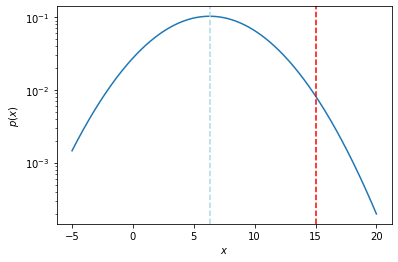

In [2]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

x0 = 15
mu = 6.3
sigma = np.sqrt(15)

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

# plot the measurement and its assumed pdf
w = mu - x0
x = np.linspace(-5,20, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
#plt.fill_between(x, y, where=np.abs(x - mu)  , color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale("log")
plt.show()

In [3]:

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

p-value = 0.02468285653931758


he probability that in a single year are observed 15 or more hurricances is : 0.024682856539
which is smaller than (alpha=0.05)
Hurricanes per Year not distributed in normal distribution.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -5.355623844793182


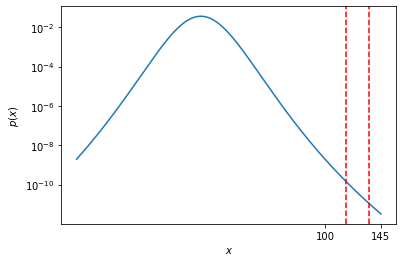

In [4]:

samples_1 = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
samples_2 = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])


sigma_1= np.sqrt(np.var(samples_1, ddof=1))# calculate the variance and its sqrt()
sigma_2=np.sqrt(np.var(samples_2, ddof=1))
sample_mean1 = np.mean(samples_1) # mean of the sample (which is different from mu)
sample_mean2 = np.mean(samples_2)
sigma=np.sqrt((sigma_1**2+sigma_2**2)/2)
# mu = 1060. # the expected value for the mean
n = len(samples_1)+len(samples_2) # the size of the data sample
# w = mu - sample_mean

# calculate the test statistics
T = (sample_mean1 - sample_mean2) / (sigma * np.sqrt(2/n))
print("T =", T)

# plot the
x = np.linspace(-100, 145, 1000)
y = stats.t.pdf(x, scale=sigma, df=n - 1)
plt.plot(x, y)
plt.axvline(sample_mean1, linestyle='--', color='red')
plt.axvline(sample_mean2, linestyle='--', color='red')
#plt.axvline(mu, linestyle='--', color='lightblue')
plt.xticks([100, 145])
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale("log")

plt.show()
# note that this is NOT a plot of the test statistics! This is a plot of the measurements

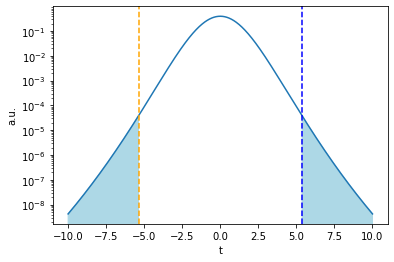

p-value = 3.615052444343338e-05


In [5]:
# plot the test statistics and its pdf
x_s = np.linspace(-10, +10, 1000)
t_s = stats.t.pdf(x_s, n - 1)
plt.plot(x_s, t_s)
plt.fill_between(x_s, t_s, where=np.abs(x_s) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.yscale("log")


plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [6]:
import pandas as pd 
from scipy import fftpack
df=pd.read_csv("populations.txt",sep="\t",header=0)

FileNotFoundError: [Errno 2] No such file or directory: 'populations.txt'

In [ ]:
years=df['year']
hare=df['hare']
lx=df['lynx']
plt.plot(years,hare)
plt.plot(years,lx)

In [ ]:
sig="hare"
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval

# The return the corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=1)

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

# Find the peak frequency: focus only on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powes = power[pos_mask]
# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)

# Check that it does indeed correspond to the frequency that we generate the signal with
#print("Does the peak correspond to the initial frequency?", np.allclose(peak_freq, ang_freq))

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], powes[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced peak detection

In [ ]:
high_freq_fft = sig_fft.copy()
# filter (set to zero) all high frequency components that are larger than peak_freq
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
# calculate the Inverse Fast Fourier Transform
filtered_sig = fftpack.ifft(high_freq_fft)
# only take the real part
real_filtered_signal = np.real(filtered_sig)

# plot the result of the IFFT
plt.figure(figsize=(8, 6))
plt.plot(years, sig, alpha=0.5, label='Original signal')
plt.plot(years, real_filtered_signal, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')

In [ ]:
sig=lx
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval

# The return the corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=1)

# Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

# Find the peak frequency: focus only on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powes = power[pos_mask]
# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)

# Check that it does indeed correspond to the frequency that we generate the signal with
#print("Does the peak correspond to the initial frequency?", np.allclose(peak_freq, ang_freq))

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], powes[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced peak detection

In [ ]:
high_freq_fft = sig_fft.copy()
# filter (set to zero) all high frequency components that are larger than peak_freq
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
# calculate the Inverse Fast Fourier Transform
filtered_sig = fftpack.ifft(high_freq_fft)
# only take the real part
real_filtered_signal = np.real(filtered_sig)

# plot the result of the IFFT
plt.figure(figsize=(8, 6))
plt.plot(years, sig, alpha=0.5, label='Original signal')
plt.plot(years, real_filtered_signal, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')

about 10 years period for both of them

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('m.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

In [ ]:
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

In [ ]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

In [ ]:
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')


In [ ]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()